In [1]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns
import random
import sys
import copy
from igraph import *
import time
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
g = Graph.Read_Ncol("Wiki-Vote.txt", directed = True)
with open('redes e centralidades/centralidades-Wiki-Vote-picke.txt', 'rb') as f:
    centralidade_list = pickle.load(f)


In [3]:
for i in centralidade_list:
    
    print sorted(i,reverse=True)[:10],'\n'

[0.16404273263986505, 0.11695248805172898, 0.10865898228844531, 0.10444194545965702, 0.10444194545965702, 0.10289569862243464, 0.08687095867303908, 0.07745290975541186, 0.07632836660106831, 0.0756255271296036] 

[0.017654409558147833, 0.016564095998753692, 0.01156258726064681, 0.008011822532712364, 0.006134997021063534, 0.0058025468349323876, 0.005438230580659509, 0.00520234737583128, 0.004714826895715727, 0.004563992520641175] 

[0.0046127158911675485, 0.0036812207295292792, 0.003524813657640259, 0.0032863743692309023, 0.0026053331717250192, 0.0025301053283849546, 0.002504703800483994, 0.0022662633042363454, 0.002170185049195958, 0.0021500675059293235] 

[0.29648297322467565, 0.29148957578089163, 0.2909224754389055, 0.28192713494645066, 0.27990070450658394, 0.2780478846701328, 0.2780065300356909, 0.27781815890206973, 0.277614273681118, 0.2765668276533207] 

[0.11719838324717527, 0.10895543930803377, 0.09817933816669912, 0.09568989575762334, 0.09552610300572507, 0.09503186906635984, 0.

In [4]:
len(centralidade_list)

7

In [5]:
X = np.array(centralidade_list)
X = X.transpose()
X[5] = stats.zscore(X[5])

# problemas de escala

# X = stats.zscore(X)
X.shape

(7115, 7)

In [6]:
varience_values = []

pca = PCA(n_components=1,svd_solver='full')
teste = pca.fit_transform(X)
explained_varience = pca.explained_variance_ratio_.sum()
print(float(pca.explained_variance_ratio_.sum()*100))
print(pca.explained_variance_ratio_,len(pca.explained_variance_ratio_))
print(pca.singular_values_,len(pca.singular_values_))  

99.999999959
(array([1.]), 1)
(array([66894.97417198]), 1)


In [7]:
lista_teste = teste.tolist()
len(lista_teste)
#  a partir daqui é so pegar os index igual no que ja tem
pca_values = []
for sublist in lista_teste:
    for item in sublist:
        pca_values.append(item)
        
len(pca_values)
# print(flat_list[:50])

7115

In [8]:
a = np.array(pca_values)
a = a.reshape(len(a),1)
X = np.append(X,a,axis=1)
X.shape

(7115, 8)

In [9]:
labels_medidas = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality','7_PCA_all(0-6)']
labels_medidas

['0_grau',
 '1_betweennes',
 '2_pagerank',
 '3_closeness',
 '4_eigenvector_centrality',
 '5_harmonic_centrality',
 '6_load_centrality',
 '7_PCA_all(0-6)']

In [10]:
#  A partir daqui analise de correlacao entre as medidas

In [11]:
def calcula_PCA(matrix,col1,col2): # pca entre duas colunas
    vindex = [i for i in range(g.vcount())]
    
    Y = np.array([matrix[:,col1],matrix[:,col2]])
    Y = Y.transpose()
#     print (Y.shape)
#     print (Y,type(Y),type(Y[0]),len(Y[0]))
    
    pca = PCA(n_components=1,svd_solver='full')
    teste = pca.fit_transform(Y)
    explained_varience = pca.explained_variance_ratio_.sum()
    print(float(pca.explained_variance_ratio_.sum()*100))
    lista_teste = teste.tolist()
    flat_list = []
    for sublist in lista_teste:
        for item in sublist:
            flat_list.append(item)
    aflat, seeds_PCA = (list(x) for x in zip(*sorted(zip(flat_list, vindex), reverse=True)))
    return (seeds_PCA,np.array(flat_list))

In [12]:
def calcKendall(matrix):
    matrix_kendall = []
    for i in range(matrix.shape[1]):
        kend = []
        for j in range(matrix.shape[1]):
            tau, p_value = kendalltau(matrix[:,i],matrix[:,j])
            kend.append(tau)
        matrix_kendall.append(kend)
    matrix_kendall = np.array(matrix_kendall)
    return(matrix_kendall)

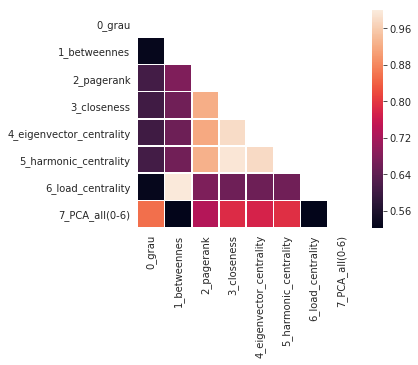

In [13]:
corr = calcKendall(X)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

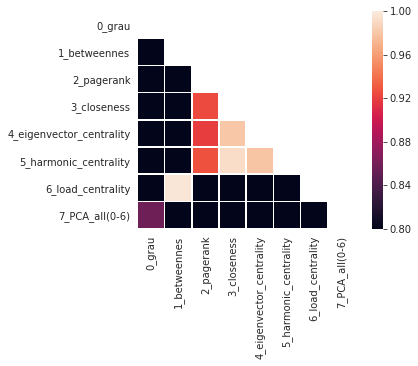

In [14]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmin=.8,mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

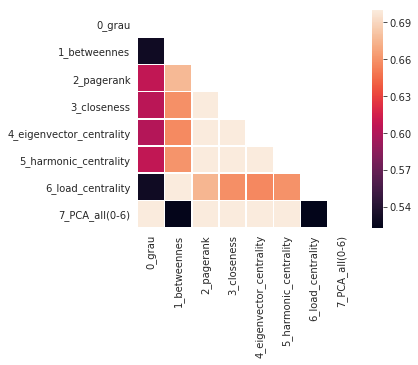

In [20]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmax = .7,mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

In [16]:
matrix_teste = X

In [17]:
# Alta correlacao Wiki-Vote

c_1_6 = calcula_PCA(matrix_teste,1,6)

c_2_3 = calcula_PCA(matrix_teste,2,3)
c_2_4 = calcula_PCA(matrix_teste,2,4)
c_2_5 = calcula_PCA(matrix_teste,2,5)

c_3_4 = calcula_PCA(matrix_teste,3,4)
c_3_5 = calcula_PCA(matrix_teste,3,5)
c_4_5 = calcula_PCA(matrix_teste,4,5)

99.9988361233
99.7842935319
89.1240982323
99.9999999963
99.2412993073
99.9999999958
99.9999999865


In [18]:
# Baixa correlacao Wiki-Vote

c_0_1 = calcula_PCA(matrix_teste,0,1)
c_0_2 = calcula_PCA(matrix_teste,0,2)
c_0_3 = calcula_PCA(matrix_teste,0,3)
c_0_4 = calcula_PCA(matrix_teste,0,4)
c_0_5 = calcula_PCA(matrix_teste,0,5)

c_1_2 = calcula_PCA(matrix_teste,1,2)
c_1_3 = calcula_PCA(matrix_teste,1,3)
c_1_4 = calcula_PCA(matrix_teste,1,4)
c_1_5 = calcula_PCA(matrix_teste,1,5)

87.4174698137
86.8386530444
99.3206777297
88.7003767645
99.999999988
99.837977011
99.7827949498
89.1407578097
99.9999999962


In [21]:
#  adicionando na matrix temporaria Wiki-Vote

matrix_teste = np.hstack((matrix_teste, np.array([c_1_6[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_2_3[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_2_4[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_2_5[1]]).transpose()))

matrix_teste = np.hstack((matrix_teste, np.array([c_3_4[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_3_5[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_4_5[1]]).transpose()))

matrix_teste = np.hstack((matrix_teste, np.array([c_0_1[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_0_2[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_0_3[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_0_4[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_0_5[1]]).transpose()))

matrix_teste = np.hstack((matrix_teste, np.array([c_1_2[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_3[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_4[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_5[1]]).transpose()))
matrix_teste.shape

(7115, 24)

In [22]:
# olhando correlacao das novas medidas da matrix teste

In [23]:
# Wiki-Vote
labels = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality','7_PCA_all','16','23','24','25','34','35','45','01','02','03','04','05','12','13','14','15']

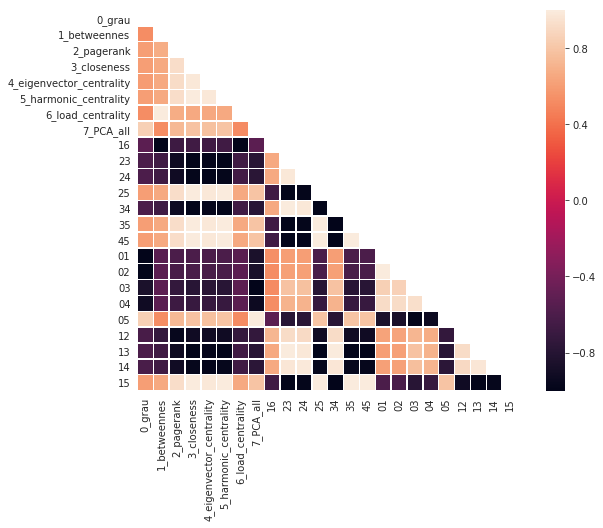

In [24]:
# 
a = plt.figure(figsize=(10,7))
corr = calcKendall(matrix_teste)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True,xticklabels=labels,yticklabels=labels,linewidths=.5)

In [25]:
import pandas as pd


In [26]:
vindex = [i for i in range(g.vcount())]

my_list = X
### my_list[0] = grau
### my_list[1] = betweenness
### my_list[2] = pagerank
### my_list[3] = closeness
### my_list[4] = eigenvector_centrality
### my_list[5] = harmonic_centrality
### my_list[6] = load_centrality 
### my_list[7] = PCA_all
### ...etc
aflat, seeds_grau = (list(x) for x in zip(*sorted(zip(my_list[:,0], vindex), reverse=True)))
aflat, seeds_betweennes = (list(x) for x in zip(*sorted(zip(my_list[:,1], vindex), reverse=True)))
aflat, seeds_pagerank = (list(x) for x in zip(*sorted(zip(my_list[:,2], vindex), reverse=True)))
aflat, seeds_closeness = (list(x) for x in zip(*sorted(zip(my_list[:,3], vindex), reverse=True)))
aflat, seeds_eigenvector_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,4], vindex), reverse=True)))
aflat, seeds_harmonic_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,5], vindex), reverse=True)))
aflat, seeds_load_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,6], vindex), reverse=True)))
aflat, seeds_PCA = (list(x) for x in zip(*sorted(zip(pca_values, vindex), reverse=True)))


In [27]:
# '16','23','24','25','34','35','45','01','02','03','04','05','12','13','14','15']
d = {'0_grau' : seeds_grau[:100],'1_betweennes':seeds_betweennes[:100],
     '2_pagerank' :seeds_pagerank[:100],'3_closeness':seeds_closeness[:100],
     '4_eigenvector_centrality':seeds_eigenvector_centrality[:100],'5_harmonic_centrality':seeds_harmonic_centrality[:100],
     '6_load_centrality':seeds_load_centrality[:100],'7_PCA_all':seeds_PCA[:100],
     'm_1_6':c_1_6[0][:100],
     
     'm_2_3':c_2_3[0][:100],'m_2_4':c_2_4[0][:100],'m_2_5':c_2_5[0][:100],
     
     'm_3_4':c_3_4[0][:100],'m_3_5':c_3_5[0][:100],
     
     'm_4_5':c_4_5[0][:100],
     
     'm_0_1':c_0_1[0][:100],'m_0_2':c_0_2[0][:100],'m_0_3':c_0_3[0][:100],'m_04':c_0_4[0][:100],'m_05':c_0_5[0][:100],
     
     'm_1_2':c_1_2[0][:100],'m_1_3':c_1_3[0][:100],'m_1_4':c_1_4[0][:100],'m_1_5':c_1_5[0][:100]}

In [28]:
df = pd.DataFrame(data=d)
df.head()

,0_grau,1_betweennes,2_pagerank,3_closeness,4_eigenvector_centrality,5_harmonic_centrality,6_load_centrality,7_PCA_all,m_04,m_05,...,m_1_3,m_1_4,m_1_5,m_1_6,m_2_3,m_2_4,m_2_5,m_3_4,m_3_5,m_4_5
0,699,699,326,326,905,326,699,326,5,326,...,5,5,326,5,5,5,326,5,326,326
1,286,286,409,409,326,409,286,409,7114,409,...,7114,7114,409,7114,7114,7114,409,7114,409,409
2,2374,409,1332,905,409,905,409,905,7112,905,...,7113,7113,905,7113,7113,7113,905,7113,905,905
3,1052,410,711,286,1141,286,410,286,7111,286,...,7112,7112,286,7112,7112,7112,286,7112,286,286
4,408,902,905,697,711,247,902,247,7109,247,...,7111,7111,247,7111,7111,7111,247,7111,247,247


In [30]:
s = [seeds_grau[:50],seeds_betweennes[:50],
    seeds_pagerank[:50],seeds_closeness[:50],
    seeds_eigenvector_centrality[:50],seeds_harmonic_centrality[:50],
    seeds_load_centrality[:50],seeds_PCA[:50],
    c_1_6[0][:50],
     
    c_2_3[0][:50],c_2_4[0][:50],c_2_5[0][:50],
     
    c_3_4[0][:50],c_3_5[0][:50],
    
    c_4_5[0][:50],
     
    c_0_1[0][:50],c_0_2[0][:50],c_0_3[0][:50],c_0_4[0][:50],c_0_5[0][:50],
     
    c_1_2[0][:50],c_1_3[0][:50],c_1_4[0][:50],c_1_5[0][:50]]
with open('sementes-Wiki-Vote.txt', 'wb') as f:
    pickle.dump(s, f)